# Pakistan E-commerce Dataset - EDA & Data Analysis
## Exploratory Data Analysis

### Analysis Steps:
1. Load Clean Data
2. Dataset Overview
3. Univariate Analysis
4. Bivariate Analysis
5. Time Series Analysis
6. Customer Analysis
7. Product Analysis
8. Business Insights

## 1. Import Libraries & Load Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load clean data
df = pd.read_csv('data/cleaned_final_data.csv', parse_dates=['created_at', 'working_date', 'customer_since', 'm-y'])

print("="*60)
print("CLEAN DATA LOADED SUCCESSFULLY")
print("="*60)
print(f"Shape: {df.shape}")
print(f"Rows: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*60)

CLEAN DATA LOADED SUCCESSFULLY
Shape: (570901, 21)
Rows: 570,901
Columns: 21
Memory: 361.76 MB


## 2. Dataset Overview

In [2]:
# First look at data
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,working_date,bi_status,mv,year,month,customer_since,m-y,fy,customer_id
0,211131.0,complete,2016-07-01,kreations_yi 06-l,1950.0,1.0,1950.0,100147443,women's fashion,unknown,0.0,cod,2016-07-01,#ref!,"1,950",2016.0,7.0,2016-07-01,2016-07-01,FY17,1.0
1,211133.0,canceled,2016-07-01,kcc_buy 2 frey air freshener & get 1 kasual bo...,240.0,1.0,240.0,100147444,beauty & grooming,unknown,0.0,cod,2016-07-01,gross,240,2016.0,7.0,2016-07-01,2016-07-01,FY17,2.0
2,211134.0,canceled,2016-07-01,ego_up0017-999-mr0,2450.0,1.0,2450.0,100147445,women's fashion,unknown,0.0,cod,2016-07-01,gross,"2,450",2016.0,7.0,2016-07-01,2016-07-01,FY17,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,beauty & grooming,r-fsd-52352,300.0,cod,2016-07-01,net,360,2016.0,7.0,2016-07-01,2016-07-01,FY17,4.0
4,211136.0,order_refunded,2016-07-01,bk7010400ag,555.0,2.0,1110.0,100147447,soghaat,unknown,0.0,cod,2016-07-01,valid,"1,110",2016.0,7.0,2016-07-01,2016-07-01,FY17,5.0


In [3]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570901 entries, 0 to 570900
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                570901 non-null  float64       
 1   status                 570901 non-null  object        
 2   created_at             570901 non-null  datetime64[ns]
 3   sku                    570901 non-null  object        
 4   price                  570901 non-null  float64       
 5   qty_ordered            570901 non-null  float64       
 6   grand_total            570901 non-null  float64       
 7   increment_id           570901 non-null  object        
 8   category_name_1        570901 non-null  object        
 9   sales_commission_code  570901 non-null  object        
 10  discount_amount        570901 non-null  float64       
 11  payment_method         570901 non-null  object        
 12  working_date           570901 non-null  date

In [4]:
# Statistical summary
df.describe()

,item_id,created_at,price,qty_ordered,grand_total,discount_amount,working_date,year,month,customer_since,m-y,customer_id
count,570901.000000,570901,570901.000000,570901.000000,5.709010e+05,570901.000000,570901,570901.000000,570901.000000,570901,570901,570901.000000
mean,564090.748487,2017-08-06 20:20:12.105076736,5487.197949,1.279637,7.417684e+03,482.468429,2017-08-06 20:20:12.105076736,2017.037896,7.187229,2017-04-23 15:07:05.699727616,2017-07-21 06:12:40.595620096,45595.852181
min,211131.000000,2016-07-01 00:00:00,27.000000,1.000000,0.000000e+00,0.000000,2016-07-01 00:00:00,2016.000000,1.000000,2016-07-01 00:00:00,2016-07-01 00:00:00,1.000000
25%,393200.000000,2017-01-25 00:00:00,370.000000,1.000000,9.500000e+02,0.000000,2017-01-25 00:00:00,2017.000000,4.000000,2016-11-01 00:00:00,2017-01-01 00:00:00,13516.000000
50%,567191.000000,2017-08-15 00:00:00,900.000000,1.000000,1.969000e+03,0.000000,2017-08-15 00:00:00,2017.000000,7.000000,2017-04-01 00:00:00,2017-08-01 00:00:00,42758.000000
75%,736512.000000,2018-01-27 00:00:00,4000.000000,1.000000,6.791400e+03,168.000000,2018-01-27 00:00:00,2018.000000,11.000000,2017-11-01 00:00:00,2018-01-01 00:00:00,73194.000000
max,905205.000000,2018-08-28 00:00:00,83770.000000,1000.000000,1.788800e+07,50355.250000,2018-08-28 00:00:00,2018.000000,12.000000,2018-08-01 00:00:00,2018-08-01 00:00:00,115326.000000
std,199643.144376,NaN,11362.046725,3.693059,6.014741e+04,1409.986045,NaN,0.706402,3.495420,NaN,NaN,34243.500049


## 3. Univariate Analysis
### 3.1 Numerical Variables

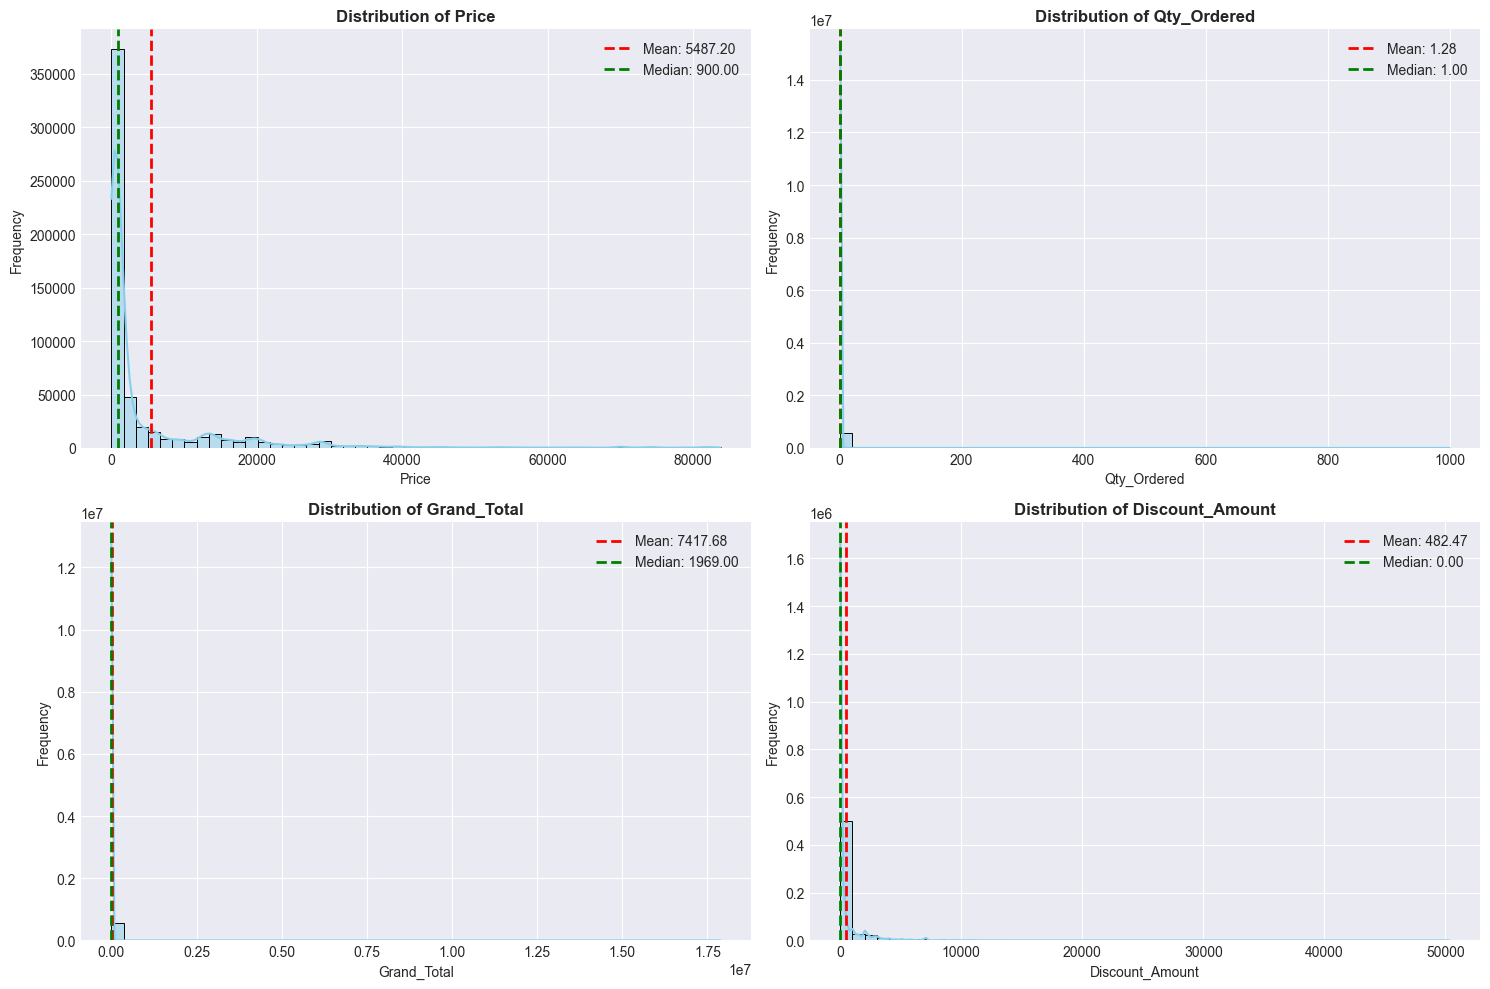

In [5]:
# Numerical columns distribution
numerical_cols = ['price', 'qty_ordered', 'grand_total', 'discount_amount']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col.title()}', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel(col.title())
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

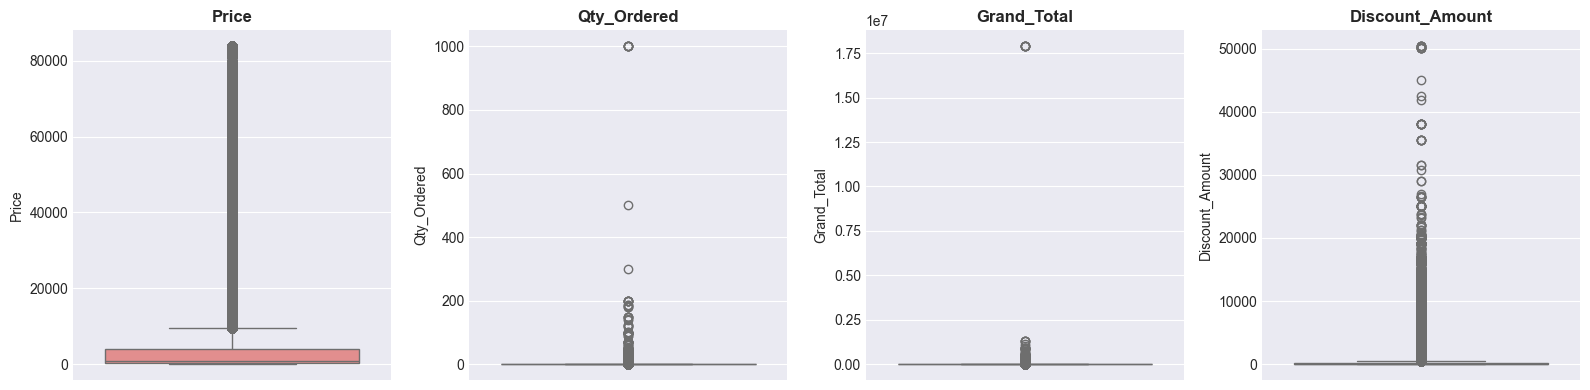

In [6]:
# Boxplots for numerical variables
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'{col.title()}', fontweight='bold')
    axes[idx].set_ylabel(col.title())

plt.tight_layout()
plt.show()

### 3.2 Categorical Variables

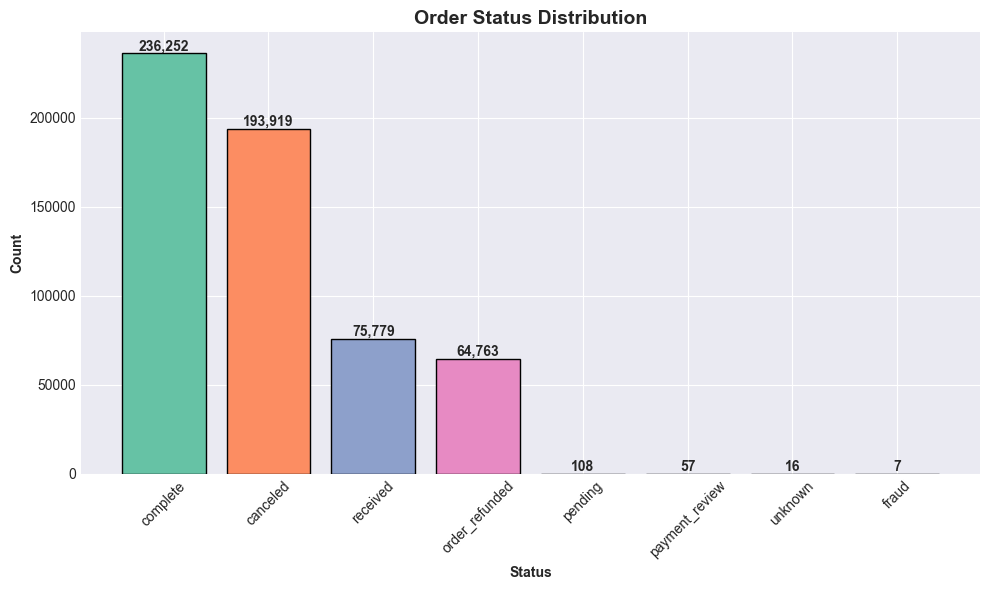


Status Statistics:
status
complete          236252
canceled          193919
received           75779
order_refunded     64763
pending              108
payment_review        57
unknown               16
fraud                  7
Name: count, dtype: int64

Percentage:
status
complete          41.38
canceled          33.97
received          13.27
order_refunded    11.34
pending            0.02
payment_review     0.01
unknown            0.00
fraud              0.00
Name: count, dtype: float64


In [7]:
# Status distribution
fig, ax = plt.subplots(figsize=(10, 6))
status_counts = df['status'].value_counts()
colors = sns.color_palette('Set2', len(status_counts))

bars = ax.bar(status_counts.index, status_counts.values, color=colors, edgecolor='black')
ax.set_title('Order Status Distribution', fontweight='bold', fontsize=14)
ax.set_xlabel('Status', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nStatus Statistics:")
print(status_counts)
print(f"\nPercentage:")
print((status_counts / status_counts.sum() * 100).round(2))

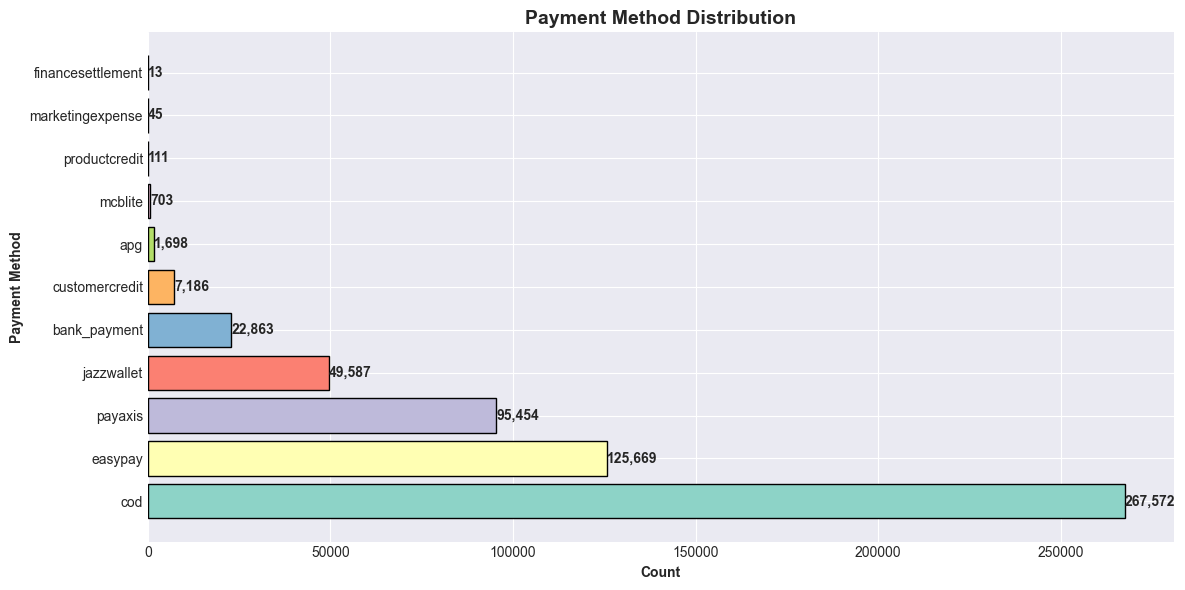


Payment Method Statistics:
payment_method
cod                  267572
easypay              125669
payaxis               95454
jazzwallet            49587
bank_payment          22863
customercredit         7186
apg                    1698
mcblite                 703
productcredit           111
marketingexpense         45
financesettlement        13
Name: count, dtype: int64

Percentage:
payment_method
cod                  46.87
easypay              22.01
payaxis              16.72
jazzwallet            8.69
bank_payment          4.00
customercredit        1.26
apg                   0.30
mcblite               0.12
productcredit         0.02
marketingexpense      0.01
financesettlement     0.00
Name: count, dtype: float64


In [8]:
# Payment method distribution
fig, ax = plt.subplots(figsize=(12, 6))
payment_counts = df['payment_method'].value_counts()
colors = sns.color_palette('Set3', len(payment_counts))

bars = ax.barh(payment_counts.index, payment_counts.values, color=colors, edgecolor='black')
ax.set_title('Payment Method Distribution', fontweight='bold', fontsize=14)
ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Payment Method', fontweight='bold')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'{int(width):,}',
            ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPayment Method Statistics:")
print(payment_counts)
print(f"\nPercentage:")
print((payment_counts / payment_counts.sum() * 100).round(2))

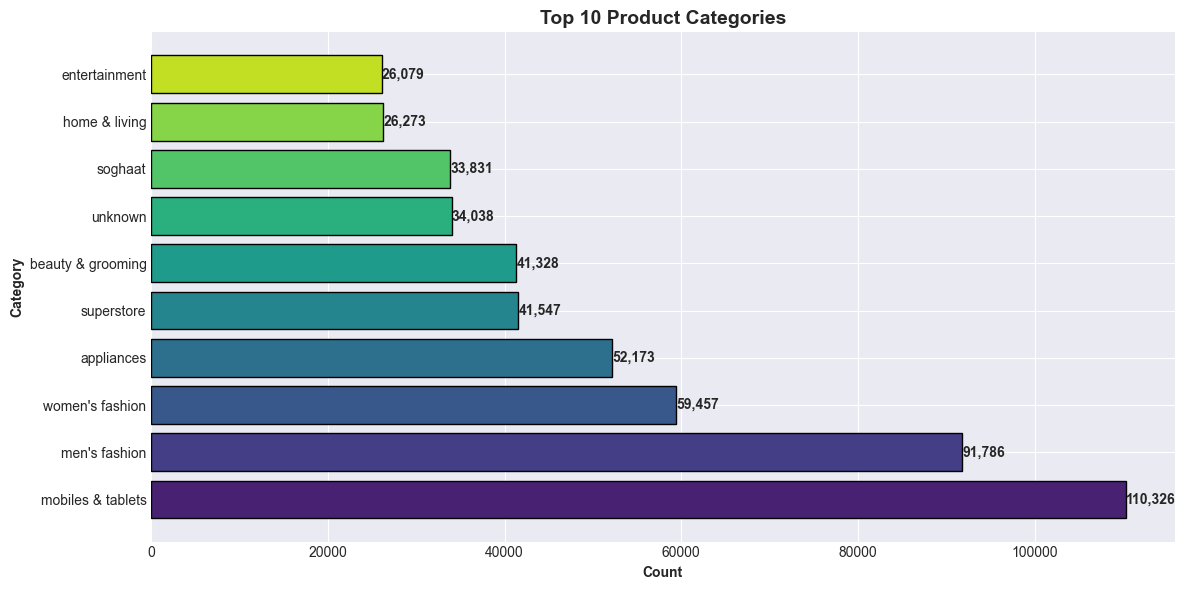


Top 10 Categories:
category_name_1
mobiles & tablets    110326
men's fashion         91786
women's fashion       59457
appliances            52173
superstore            41547
beauty & grooming     41328
unknown               34038
soghaat               33831
home & living         26273
entertainment         26079
Name: count, dtype: int64


In [9]:
# Top 10 categories
fig, ax = plt.subplots(figsize=(12, 6))
top_categories = df['category_name_1'].value_counts().head(10)
colors = sns.color_palette('viridis', len(top_categories))

bars = ax.barh(top_categories.index, top_categories.values, color=colors, edgecolor='black')
ax.set_title('Top 10 Product Categories', fontweight='bold', fontsize=14)
ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Category', fontweight='bold')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'{int(width):,}',
            ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 10 Categories:")
print(top_categories)

## 4. Bivariate Analysis
### 4.1 Price vs Status

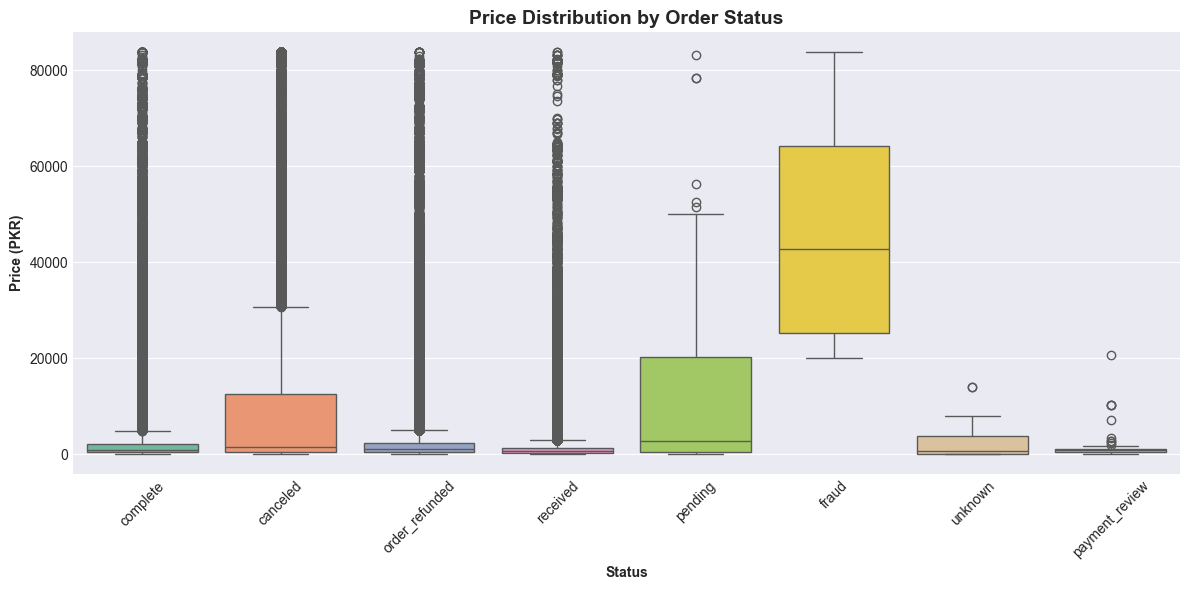


Price Statistics by Status:
                   count      mean       std      min      25%      50%  \
status                                                                    
canceled        193919.0   8613.82  14290.49     27.0    500.0   1549.0   
complete        236252.0   4035.77   8854.57     27.0    325.0    749.0   
fraud                7.0  46527.71  27080.86  19999.0  25250.0  42755.0   
order_refunded   64763.0   4683.66  11568.74     27.0    449.0    975.0   
payment_review      57.0   1820.02   3431.41     90.0    480.0    795.0   
pending            108.0  13051.48  18289.45     28.0    499.0   2777.0   
received         75779.0   2686.58   7099.54     27.0    250.0    599.0   
unknown             16.0   3145.44   4816.51     75.0    100.0    582.5   

                     75%      max  
status                             
canceled        12599.00  83770.0  
complete         2158.00  83770.0  
fraud           64335.00  83770.0  
order_refunded   2250.00  83770.0  
paym

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='status', y='price', palette='Set2', ax=ax)
ax.set_title('Price Distribution by Order Status', fontweight='bold', fontsize=14)
ax.set_xlabel('Status', fontweight='bold')
ax.set_ylabel('Price (PKR)', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Statistical summary by status
print("\nPrice Statistics by Status:")
print(df.groupby('status')['price'].describe().round(2))

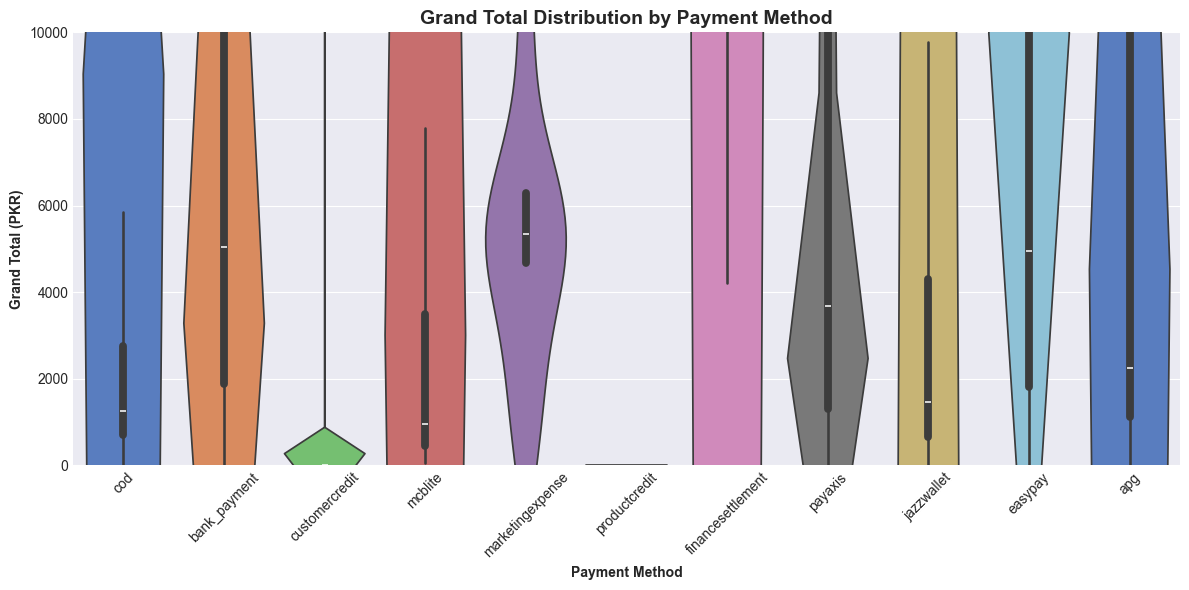


Grand Total Statistics by Payment Method:
                      count       mean        std      min       25%      50%  \
payment_method                                                                  
apg                  1698.0   13597.15   38424.49    13.52   1128.45   2248.0   
bank_payment        22863.0   16863.60   36647.66     0.00   1888.00   5035.0   
cod                267572.0    3839.08    9094.15     0.00    710.00   1249.0   
customercredit       7186.0      17.36     995.98     0.00      0.00      0.0   
easypay            125669.0   11190.84   17711.75     0.00   1818.00   4949.0   
financesettlement      13.0  104013.38  131933.91  4212.00  13000.00  66493.0   
jazzwallet          49587.0    7793.87  197120.64     0.00    649.50   1466.5   
marketingexpense       45.0    5845.31    3823.33  1260.00   4680.00   5340.0   
mcblite               703.0   10218.92   70784.55    50.00    455.00    950.0   
payaxis             95454.0   10446.41   18132.64     0.00   1311.

In [11]:
# Grand Total vs Payment Method
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=df, x='payment_method', y='grand_total', palette='muted', ax=ax)
ax.set_title('Grand Total Distribution by Payment Method', fontweight='bold', fontsize=14)
ax.set_xlabel('Payment Method', fontweight='bold')
ax.set_ylabel('Grand Total (PKR)', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(0, 10000)  # Focus on main range
plt.tight_layout()
plt.show()

print("\nGrand Total Statistics by Payment Method:")
print(df.groupby('payment_method')['grand_total'].describe().round(2))

### 4.2 Category Analysis

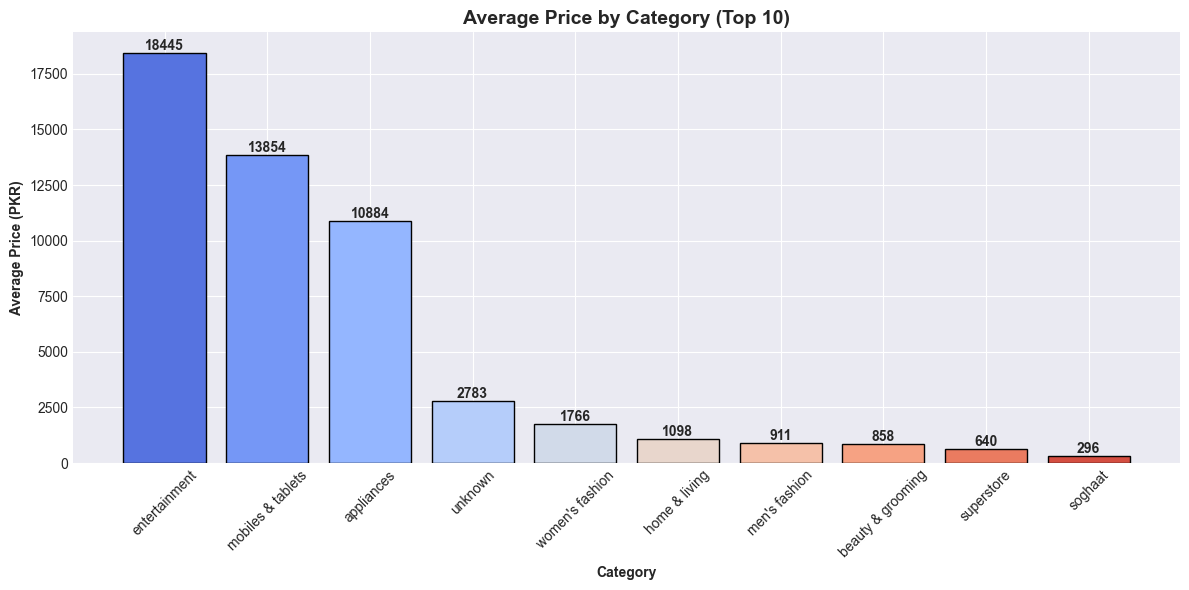


Average Price by Category:
category_name_1
entertainment        18445.38
mobiles & tablets    13854.34
appliances           10883.85
unknown               2783.45
women's fashion       1765.72
home & living         1097.53
men's fashion          910.85
beauty & grooming      858.35
superstore             640.18
soghaat                295.63
Name: price, dtype: float64


In [12]:
# Average price by top 10 categories
top_10_cats = df['category_name_1'].value_counts().head(10).index
df_top_cats = df[df['category_name_1'].isin(top_10_cats)]

avg_price = df_top_cats.groupby('category_name_1')['price'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(avg_price.index, avg_price.values, color=sns.color_palette('coolwarm', len(avg_price)), edgecolor='black')
ax.set_title('Average Price by Category (Top 10)', fontweight='bold', fontsize=14)
ax.set_xlabel('Category', fontweight='bold')
ax.set_ylabel('Average Price (PKR)', fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nAverage Price by Category:")
print(avg_price.round(2))

### 4.3 Correlation Analysis

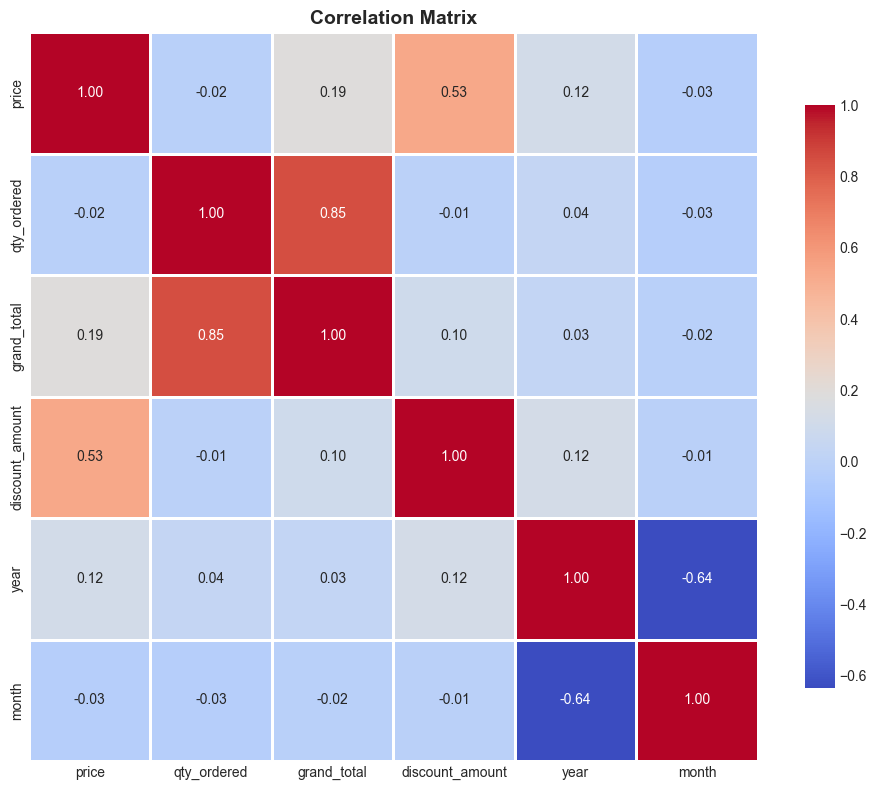


Correlation Matrix:
                 price  qty_ordered  grand_total  discount_amount  year  month
price             1.00        -0.02         0.19             0.53  0.12  -0.03
qty_ordered      -0.02         1.00         0.85            -0.01  0.04  -0.03
grand_total       0.19         0.85         1.00             0.10  0.03  -0.02
discount_amount   0.53        -0.01         0.10             1.00  0.12  -0.01
year              0.12         0.04         0.03             0.12  1.00  -0.64
month            -0.03        -0.03        -0.02            -0.01 -0.64   1.00


In [14]:
# Correlation heatmap
numerical_features = ['price', 'qty_ordered', 'grand_total', 'discount_amount', 'year', 'month']
correlation = df[numerical_features].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation.round(2))

## 5. Time Series Analysis
### 5.1 Orders Over Time

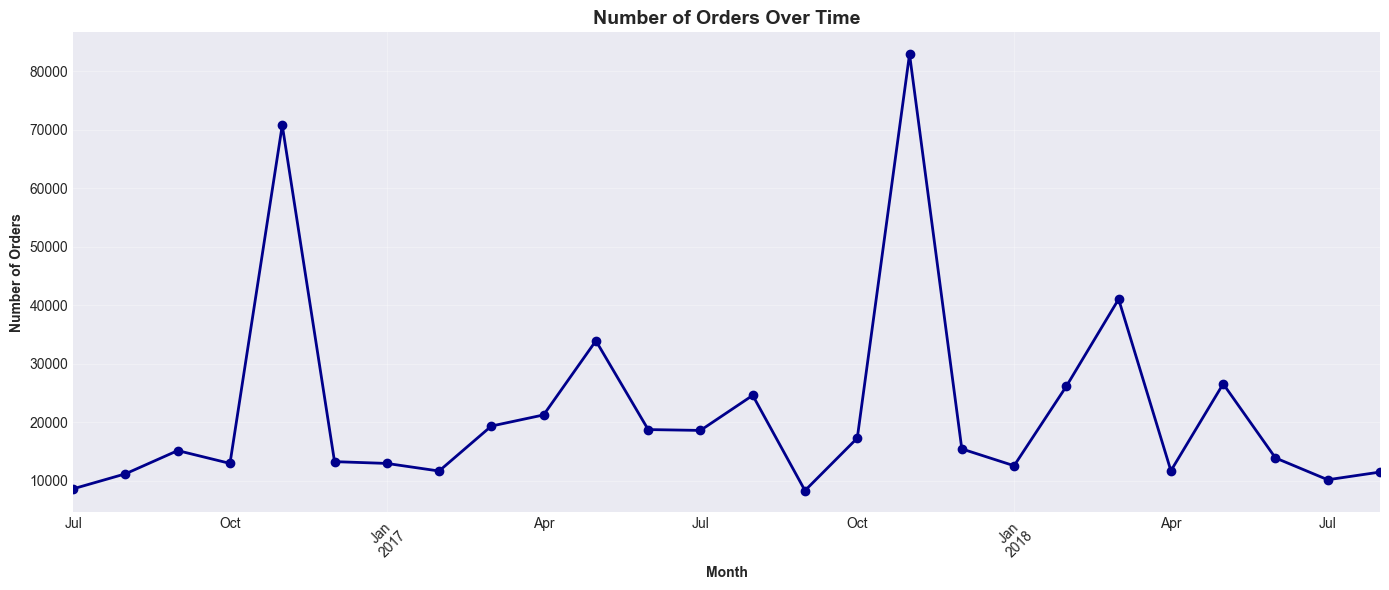


Monthly Orders:
year_month
2016-07     8633
2016-08    11195
2016-09    15167
2016-10    12976
2016-11    70784
2016-12    13278
2017-01    12973
2017-02    11675
2017-03    19357
2017-04    21264
2017-05    33935
2017-06    18759
2017-07    18616
2017-08    24607
2017-09     8332
2017-10    17300
2017-11    82928
2017-12    15454
2018-01    12578
2018-02    26161
2018-03    41050
2018-04    11716
2018-05    26574
2018-06    13912
2018-07    10181
2018-08    11496
Freq: M, dtype: int64


In [15]:
# Orders per month
df['year_month'] = df['created_at'].dt.to_period('M')
monthly_orders = df.groupby('year_month').size()

fig, ax = plt.subplots(figsize=(14, 6))
monthly_orders.plot(kind='line', marker='o', linewidth=2, markersize=6, color='darkblue', ax=ax)
ax.set_title('Number of Orders Over Time', fontweight='bold', fontsize=14)
ax.set_xlabel('Month', fontweight='bold')
ax.set_ylabel('Number of Orders', fontweight='bold')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nMonthly Orders:")
print(monthly_orders)

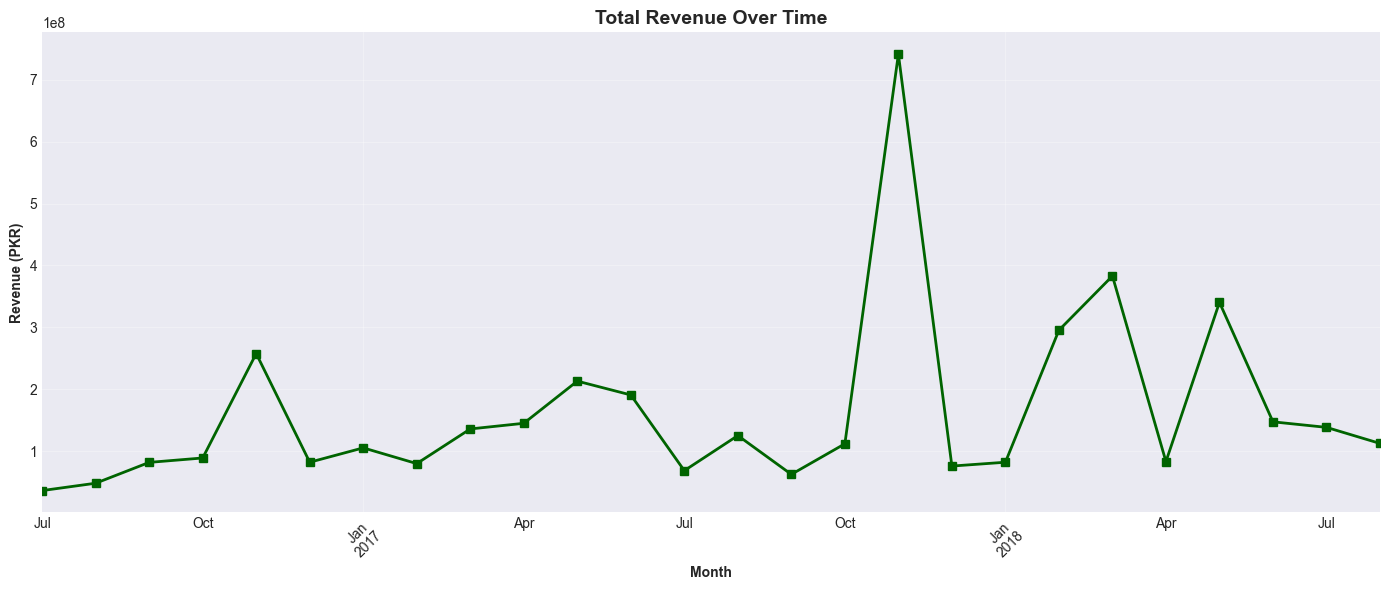


Monthly Revenue:
year_month
2016-07     36,412,042
2016-08     48,297,880
2016-09     81,950,599
2016-10     89,070,678
2016-11    257,726,138
2016-12     82,202,993
2017-01    105,401,725
2017-02     79,980,433
2017-03    135,966,051
2017-04    145,081,807
2017-05    213,208,228
2017-06    190,847,415
2017-07     68,579,022
2017-08    125,271,496
2017-09     62,597,448
2017-10    111,968,182
2017-11    741,335,788
2017-12     76,003,142
2018-01     82,196,171
2018-02    295,434,049
2018-03    383,027,035
2018-04     83,214,652
2018-05    340,453,250
2018-06    147,449,513
2018-07    138,519,459
2018-08    112,568,084
Freq: M, Name: grand_total, dtype: object


In [16]:
# Revenue over time
monthly_revenue = df.groupby('year_month')['grand_total'].sum()

fig, ax = plt.subplots(figsize=(14, 6))
monthly_revenue.plot(kind='line', marker='s', linewidth=2, markersize=6, color='darkgreen', ax=ax)
ax.set_title('Total Revenue Over Time', fontweight='bold', fontsize=14)
ax.set_xlabel('Month', fontweight='bold')
ax.set_ylabel('Revenue (PKR)', fontweight='bold')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nMonthly Revenue:")
print(monthly_revenue.apply(lambda x: f'{x:,.0f}'))

### 5.2 Seasonal Patterns

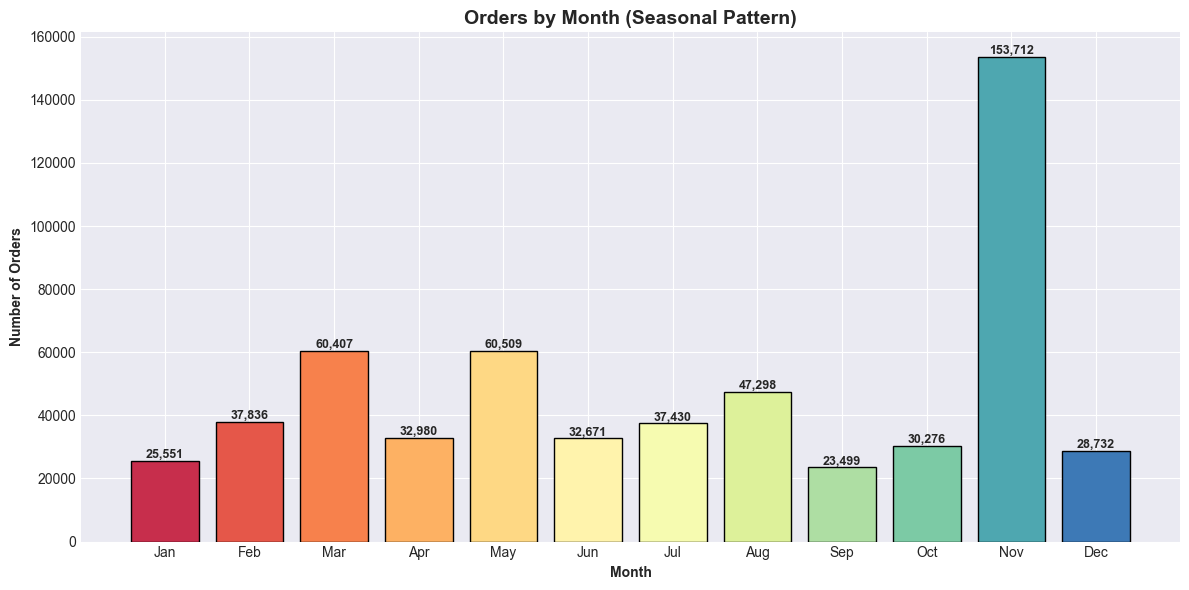


Orders by Month:
month
1.0      25551
2.0      37836
3.0      60407
4.0      32980
5.0      60509
6.0      32671
7.0      37430
8.0      47298
9.0      23499
10.0     30276
11.0    153712
12.0     28732
dtype: int64


In [17]:
# Orders by month
monthly_pattern = df.groupby('month').size()

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(monthly_pattern.index, monthly_pattern.values, 
              color=sns.color_palette('Spectral', 12), edgecolor='black')
ax.set_title('Orders by Month (Seasonal Pattern)', fontweight='bold', fontsize=14)
ax.set_xlabel('Month', fontweight='bold')
ax.set_ylabel('Number of Orders', fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\nOrders by Month:")
print(monthly_pattern)

## 6. Customer Analysis

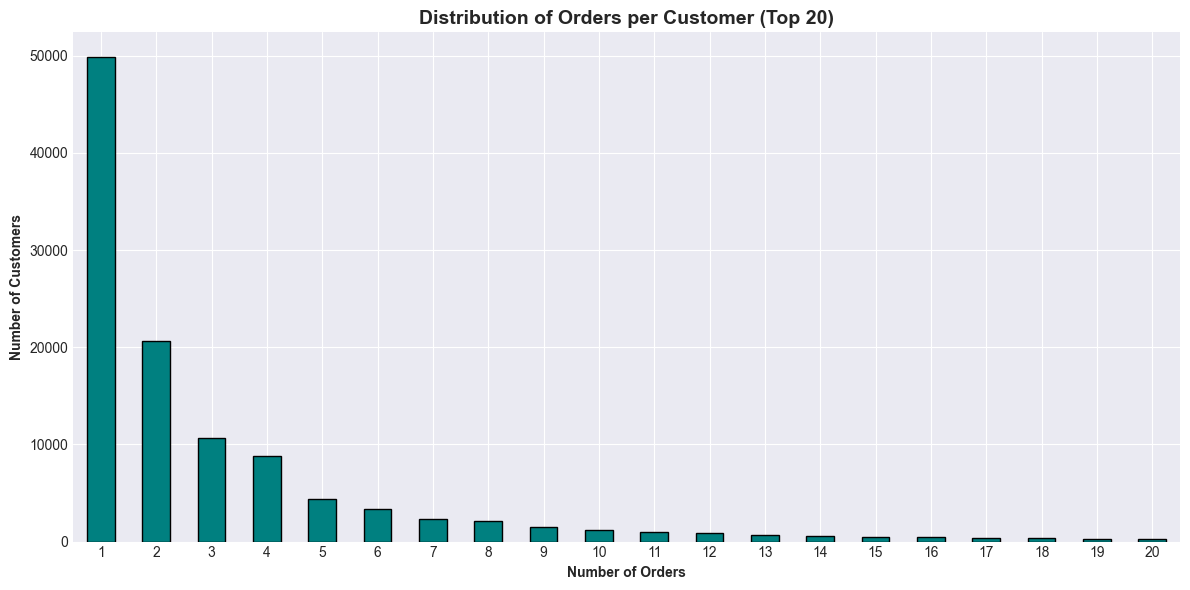


Customer Orders Statistics:
count    114169.000000
mean          5.000491
std          22.793333
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2524.000000
Name: order_count, dtype: float64

Customers with 1 order: 49,902
Customers with 2+ orders: 64,267


In [18]:
# Orders per customer
customer_orders = df.groupby('customer_id').size().reset_index(name='order_count')
customer_orders_dist = customer_orders['order_count'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
customer_orders_dist.head(20).plot(kind='bar', color='teal', edgecolor='black', ax=ax)
ax.set_title('Distribution of Orders per Customer (Top 20)', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Orders', fontweight='bold')
ax.set_ylabel('Number of Customers', fontweight='bold')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

print("\nCustomer Orders Statistics:")
print(customer_orders['order_count'].describe())
print(f"\nCustomers with 1 order: {(customer_orders['order_count'] == 1).sum():,}")
print(f"Customers with 2+ orders: {(customer_orders['order_count'] > 1).sum():,}")

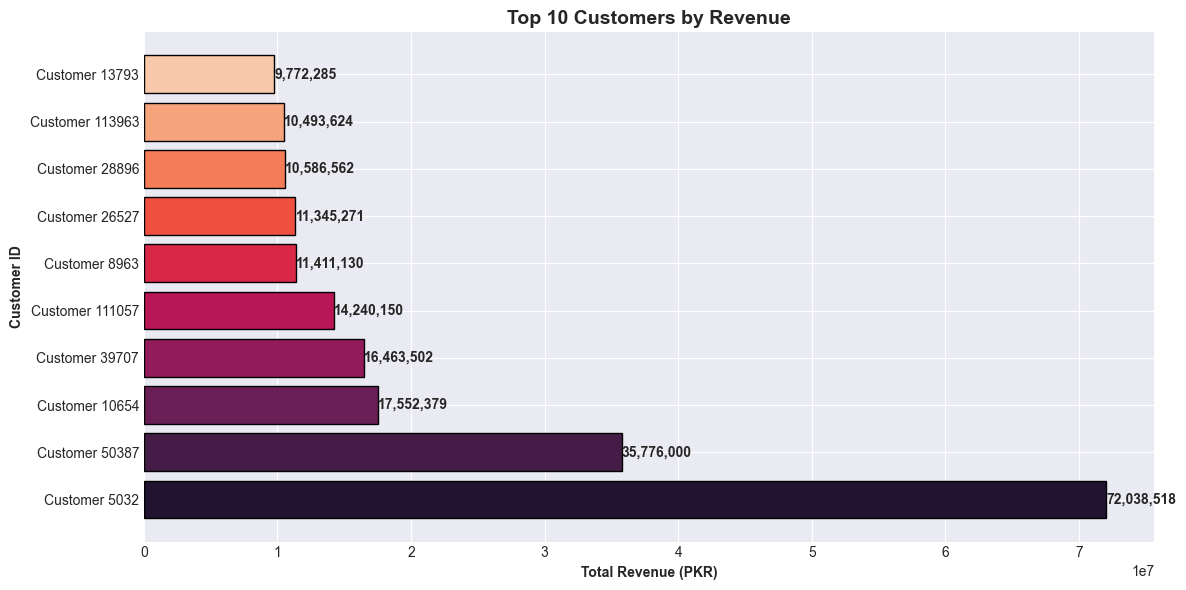


Top 10 Customers by Revenue:
customer_id
5032.0      72,038,518
50387.0     35,776,000
10654.0     17,552,379
39707.0     16,463,502
111057.0    14,240,150
8963.0      11,411,130
26527.0     11,345,271
28896.0     10,586,562
113963.0    10,493,624
13793.0      9,772,285
Name: grand_total, dtype: object


In [19]:
# Top 10 customers by revenue
customer_revenue = df.groupby('customer_id')['grand_total'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(range(len(customer_revenue)), customer_revenue.values, 
               color=sns.color_palette('rocket', len(customer_revenue)), edgecolor='black')
ax.set_title('Top 10 Customers by Revenue', fontweight='bold', fontsize=14)
ax.set_xlabel('Total Revenue (PKR)', fontweight='bold')
ax.set_ylabel('Customer ID', fontweight='bold')
ax.set_yticks(range(len(customer_revenue)))
ax.set_yticklabels([f'Customer {int(id)}' for id in customer_revenue.index])

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:,.0f}',
            ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 10 Customers by Revenue:")
print(customer_revenue.apply(lambda x: f'{x:,.0f}'))

## 7. Product Analysis

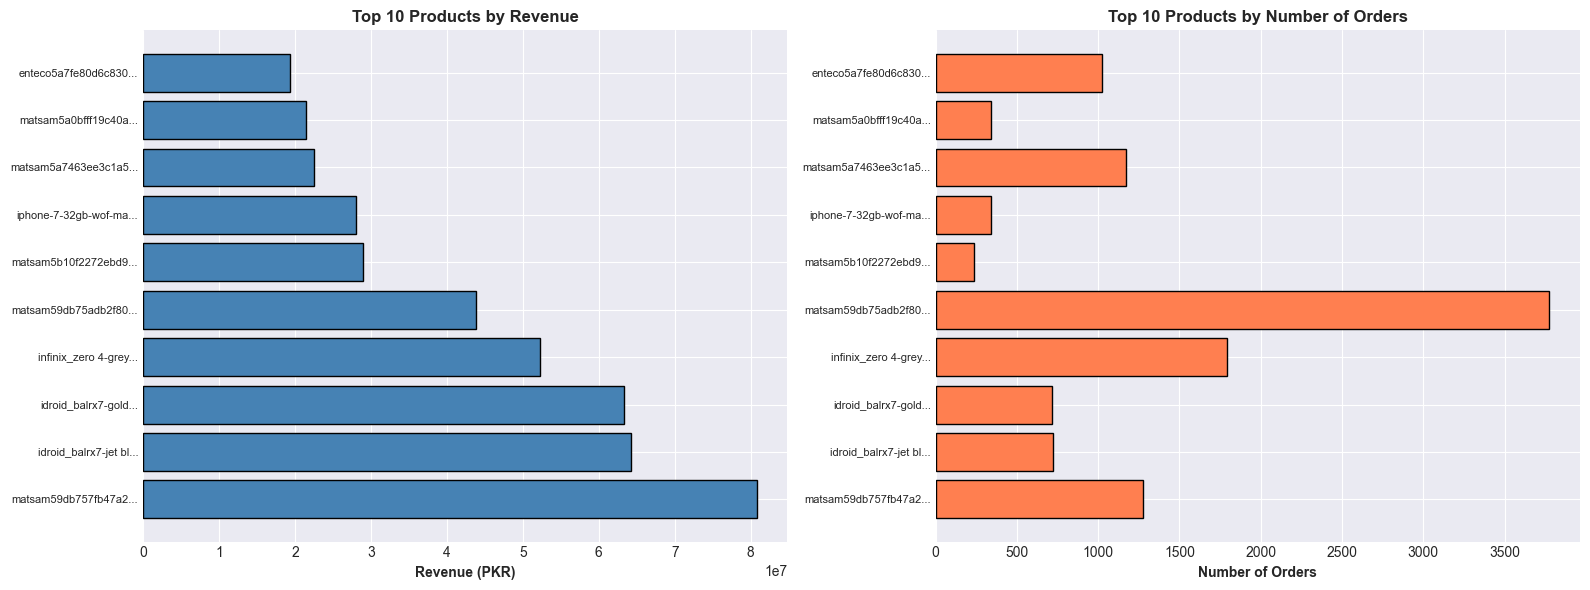


Top 10 Products:
                                  revenue  orders
sku                                              
matsam59db757fb47a2           80806648.00    1273
idroid_balrx7-jet black       64212549.63     722
idroid_balrx7-gold            63338897.50     715
infinix_zero 4-grey           52216910.46    1793
matsam59db75adb2f80           43824631.78    3775
matsam5b10f2272ebd9           28946781.01     239
iphone-7-32gb-wof-matt black  28081376.25     338
matsam5a7463ee3c1a5           22525696.22    1171
matsam5a0bfff19c40a           21454982.00     342
enteco5a7fe80d6c830           19352959.47    1023


In [20]:
# Top 10 products by sales
top_products = df.groupby('sku').agg({
    'grand_total': 'sum',
    'item_id': 'count'
}).rename(columns={'grand_total': 'revenue', 'item_id': 'orders'}).sort_values('revenue', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Revenue
axes[0].barh(range(len(top_products)), top_products['revenue'], 
             color='steelblue', edgecolor='black')
axes[0].set_title('Top 10 Products by Revenue', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Revenue (PKR)', fontweight='bold')
axes[0].set_yticks(range(len(top_products)))
axes[0].set_yticklabels([f'{sku[:20]}...' for sku in top_products.index], fontsize=8)

# Orders
axes[1].barh(range(len(top_products)), top_products['orders'], 
             color='coral', edgecolor='black')
axes[1].set_title('Top 10 Products by Number of Orders', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Number of Orders', fontweight='bold')
axes[1].set_yticks(range(len(top_products)))
axes[1].set_yticklabels([f'{sku[:20]}...' for sku in top_products.index], fontsize=8)

plt.tight_layout()
plt.show()

print("\nTop 10 Products:")
print(top_products)

## 8. Business Insights Summary

In [22]:
print("="*70)
print("BUSINESS INSIGHTS SUMMARY")
print("="*70)

# Overall metrics
total_orders = len(df)
total_revenue = df['grand_total'].sum()
avg_order_value = df['grand_total'].mean()
total_customers = df['customer_id'].nunique()

print(f"\n📊 OVERALL METRICS:")
print(f"   • Total Orders: {total_orders:,}")
print(f"   • Total Revenue: PKR {total_revenue:,.2f}")
print(f"   • Average Order Value: PKR {avg_order_value:,.2f}")
print(f"   • Total Customers: {total_customers:,}")
print(f"   • Average Orders per Customer: {total_orders/total_customers:.2f}")

# Order status breakdown
print(f"\n📋 ORDER STATUS:")
status_pct = (df['status'].value_counts() / len(df) * 100).round(2)
for status, pct in status_pct.items():
    print(f"   • {status.title()}: {pct}%")

# Payment preferences
print(f"\n💳 PAYMENT METHODS:")
payment_pct = (df['payment_method'].value_counts() / len(df) * 100).round(2)
for method, pct in payment_pct.head(5).items():
    print(f"   • {method.upper()}: {pct}%")

# Top categories
print(f"\n🏆 TOP 3 CATEGORIES:")
top_cats = df['category_name_1'].value_counts().head(3)
for cat, count in top_cats.items():
    print(f"   • {cat.title()}: {count:,} orders")

# Discount analysis
orders_with_discount = (df['discount_amount'] > 0).sum()
avg_discount = df[df['discount_amount'] > 0]['discount_amount'].mean()
print(f"\n💰 DISCOUNT INSIGHTS:")
print(f"   • Orders with Discount: {orders_with_discount:,} ({orders_with_discount/total_orders*100:.2f}%)")
print(f"   • Average Discount: PKR {avg_discount:,.2f}")

# Peak months - FIX HERE
peak_month = int(df.groupby('month').size().idxmax())  # Convert to int
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(f"\n📈 TIME INSIGHTS:")
print(f"   • Peak Month: {month_names[peak_month-1]}")
print(f"   • Date Range: {df['created_at'].min().date()} to {df['created_at'].max().date()}")

print("\n" + "="*70)

BUSINESS INSIGHTS SUMMARY

📊 OVERALL METRICS:
   • Total Orders: 570,901
   • Total Revenue: PKR 4,234,763,280.00
   • Average Order Value: PKR 7,417.68
   • Total Customers: 114,169
   • Average Orders per Customer: 5.00

📋 ORDER STATUS:
   • Complete: 41.38%
   • Canceled: 33.97%
   • Received: 13.27%
   • Order_Refunded: 11.34%
   • Pending: 0.02%
   • Payment_Review: 0.01%
   • Unknown: 0.0%
   • Fraud: 0.0%

💳 PAYMENT METHODS:
   • COD: 46.87%
   • EASYPAY: 22.01%
   • PAYAXIS: 16.72%
   • JAZZWALLET: 8.69%
   • BANK_PAYMENT: 4.0%

🏆 TOP 3 CATEGORIES:
   • Mobiles & Tablets: 110,326 orders
   • Men'S Fashion: 91,786 orders
   • Women'S Fashion: 59,457 orders

💰 DISCOUNT INSIGHTS:
   • Orders with Discount: 204,552 (35.83%)
   • Average Discount: PKR 1,346.56

📈 TIME INSIGHTS:
   • Peak Month: Nov
   • Date Range: 2016-07-01 to 2018-08-28



## 9. Key Findings & Recommendations

In [23]:
print("🎯 KEY FINDINGS:")
print("\n1. ORDER STATUS:")
complete_rate = (df['status'] == 'complete').sum() / len(df) * 100
cancel_rate = (df['status'] == 'canceled').sum() / len(df) * 100
print(f"   • Completion Rate: {complete_rate:.1f}%")
print(f"   • Cancellation Rate: {cancel_rate:.1f}%")
if cancel_rate > 20:
    print(f"   ⚠️ High cancellation rate - investigate reasons")

print("\n2. PAYMENT PREFERENCES:")
cod_rate = (df['payment_method'] == 'cod').sum() / len(df) * 100
print(f"   • Cash on Delivery: {cod_rate:.1f}%")
if cod_rate > 50:
    print(f"   💡 Promote digital payment with incentives")

print("\n3. CUSTOMER BEHAVIOR:")
repeat_customers = (df.groupby('customer_id').size() > 1).sum()
print(f"   • Repeat Customers: {repeat_customers:,}")
print(f"   💡 Focus on customer retention programs")

print("\n4. REVENUE OPPORTUNITIES:")
avg_discount_pct = (df[df['discount_amount'] > 0]['discount_amount'] / 
                     df[df['discount_amount'] > 0]['grand_total'] * 100).mean()
print(f"   • Average Discount: {avg_discount_pct:.1f}%")
print(f"   💡 Optimize discount strategy")

print("\n" + "="*70)

🎯 KEY FINDINGS:

1. ORDER STATUS:
   • Completion Rate: 41.4%
   • Cancellation Rate: 34.0%
   ⚠️ High cancellation rate - investigate reasons

2. PAYMENT PREFERENCES:
   • Cash on Delivery: 46.9%

3. CUSTOMER BEHAVIOR:
   • Repeat Customers: 64,267
   💡 Focus on customer retention programs

4. REVENUE OPPORTUNITIES:
   • Average Discount: inf%
   💡 Optimize discount strategy

